In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
from scipy.signal import find_peaks

In [32]:
data = pd.read_csv("https://raw.githubusercontent.com/Ahmad20/UTS-IOT/main/Linear%20Acceleration.csv")

In [33]:
data.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.094015,-0.008252,-0.897787,-2.671416
1,0.104360,-0.190128,-2.355293,-0.548816
2,0.114370,-0.112972,-2.278666,-0.495233
3,0.124532,-0.046238,-2.174611,-0.446904
4,0.144277,0.026370,-1.941052,-0.301690


In [34]:
data.rename(columns={'Time (s)' : 'time', 'Linear Acceleration x (m/s^2)' :'Ax',	'Linear Acceleration y (m/s^2)':'Ay',	
             'Linear Acceleration z (m/s^2)':'Az'}, inplace=True)

In [35]:
data=data.set_index('time')

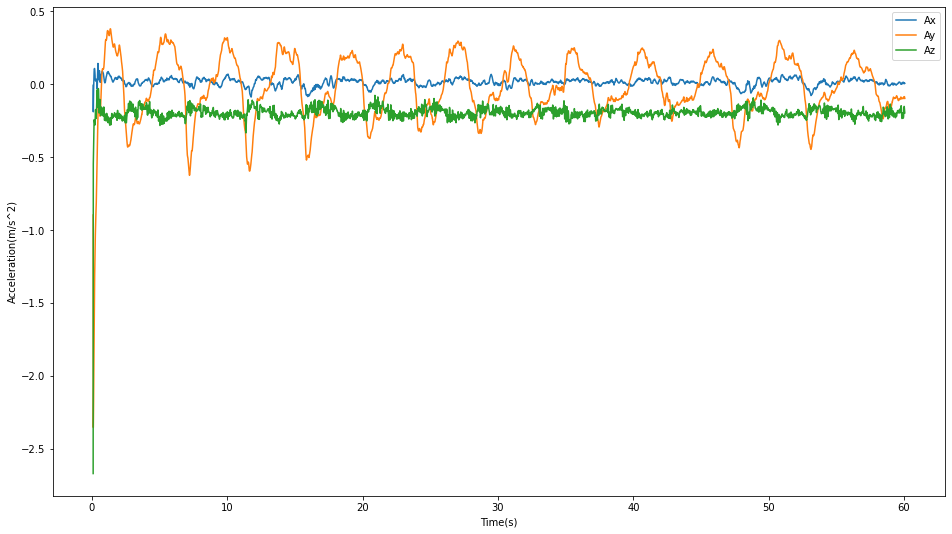

In [36]:
plt.figure(figsize=(16,9))
for col in data.columns:
  plt.plot(data.index,data[col],label=col)
  plt.xlabel("Time(s)")
plt.ylabel("Acceleration(m/s^2)")
plt.legend()
plt.show()

##Direct Method

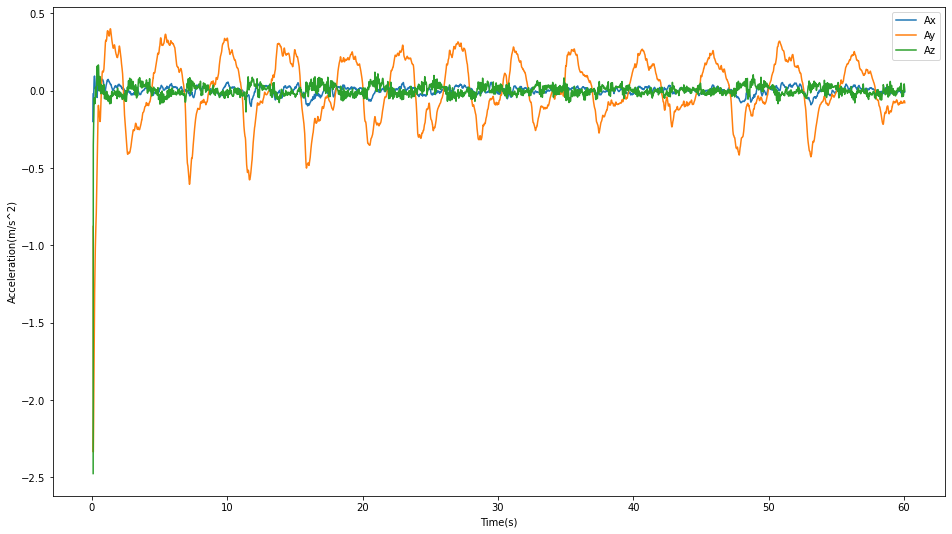

In [37]:
#Load data
plain = pd.read_csv("https://raw.githubusercontent.com/Ahmad20/UTS-IOT/main/Linear%20Acceleration.csv")
#Rename kolom data
plain.rename(columns={
    'Time (s)' : 'time', 
    'Linear Acceleration x (m/s^2)' :'Ax',	
    'Linear Acceleration y (m/s^2)':'Ay',
    'Linear Acceleration z (m/s^2)':'Az'}, inplace=True)
#Menjadikan kolom time menjadi index
plain=plain.set_index('time')
#Program Direct Method
dm=plain
dm['Ax'] = dm['Ax'] - (sum(dm['Ax'])/len(dm['Ax']))
dm['Ay'] = dm['Ay'] - (sum(dm['Ay'])/len(dm['Ay']))
dm['Az'] = dm['Az'] - (sum(dm['Az'])/len(dm['Az']))

#Visualisasi hasil direct method
plt.figure(figsize=(16,9))
for col in dm.columns:
  plt.plot(dm.index,dm[col],label=col)
plt.xlabel("Time(s)")
plt.ylabel("Acceleration(m/s^2)")
plt.legend()
plt.show()

In [38]:
print("Jumlah Data =",len(dm['Az']))
print("Rerata Ax =",(sum(dm['Ax'])/len(dm['Ax'])))
print("Rerata Ay =",(sum(dm['Ay'])/len(dm['Ay'])))
print("Rerata Az =",(sum(dm['Az'])/len(dm['Az'])))

Jumlah Data = 5375
Rerata Ax = -1.8203139254333744e-17
Rerata Ay = 6.2430680780084386e-18
Rerata Az = 1.826755800890211e-16


##Metode Inklinasi

In [39]:
rho = np.arctan(plain['Ay']/(np.sqrt(plain['Ax']**2+plain['Az']**2))).to_frame()

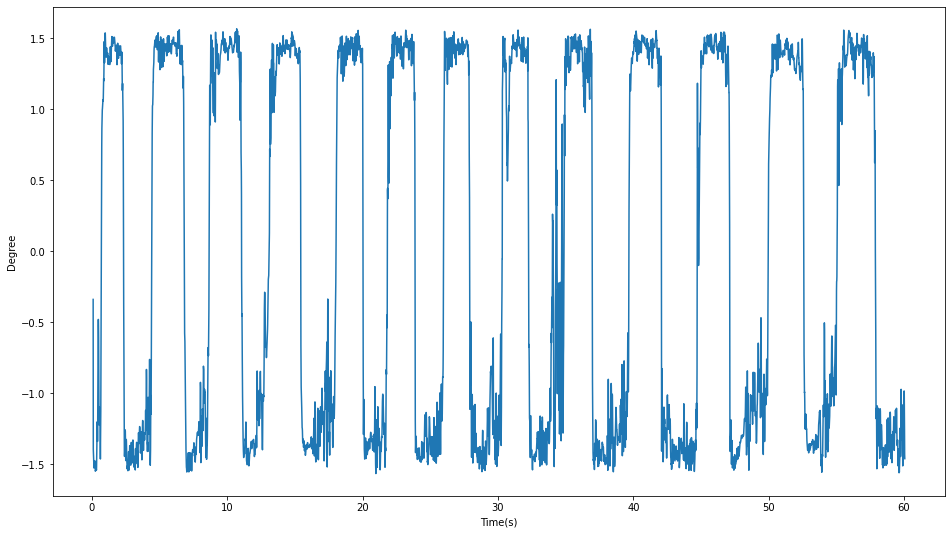

In [40]:
plt.figure(figsize=(16,9))
plt.plot(rho)
plt.xlabel("Time(s)")
plt.ylabel("Degree")
plt.show()

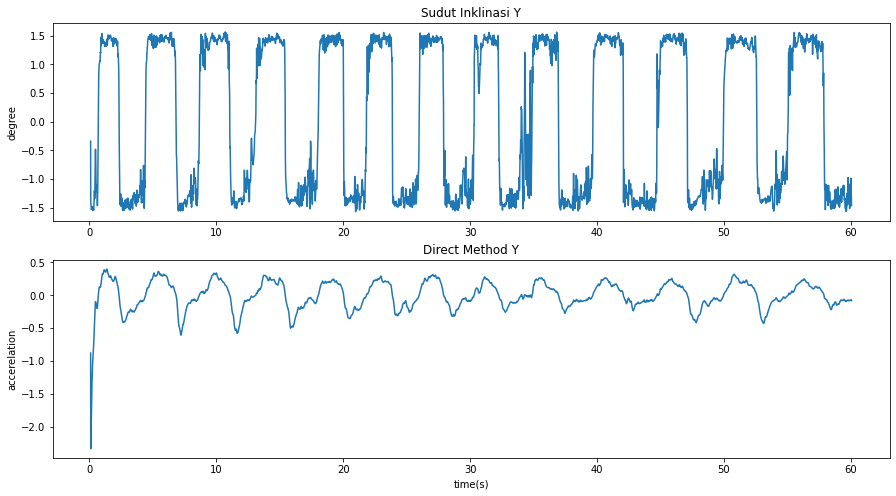

In [41]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(rho)
ax[0].set_title("Sudut Inklinasi Y")
ax[0].set_ylabel("degree")
ax[1].set_xlabel("time(s)")
ax[1].plot(dm['Ay'])
ax[1].set_title("Direct Method Y")
ax[1].set_ylabel("accerelation")
plt.show()

In [42]:
time = 60.0
FreqSamp = 100
cutoff = 0.8
nyq=0.5 * FreqSamp
order = 4
JumSamp =  int(time * FreqSamp)

In [43]:
from scipy.signal import butter,filtfilt

time = 60.0
FreqSamp = 100
cutoff = 0.8
nyq=0.5 * FreqSamp
order = 4
JumSamp =  int(time * FreqSamp)
def butter_lowpass(data,cutoff,FreqSamp,order):
  normal_cutoff = cutoff/nyq
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a,data,axis=0)
  return y

In [44]:
soal5a = butter_lowpass(dm['Ay'],cutoff,FreqSamp,order) 

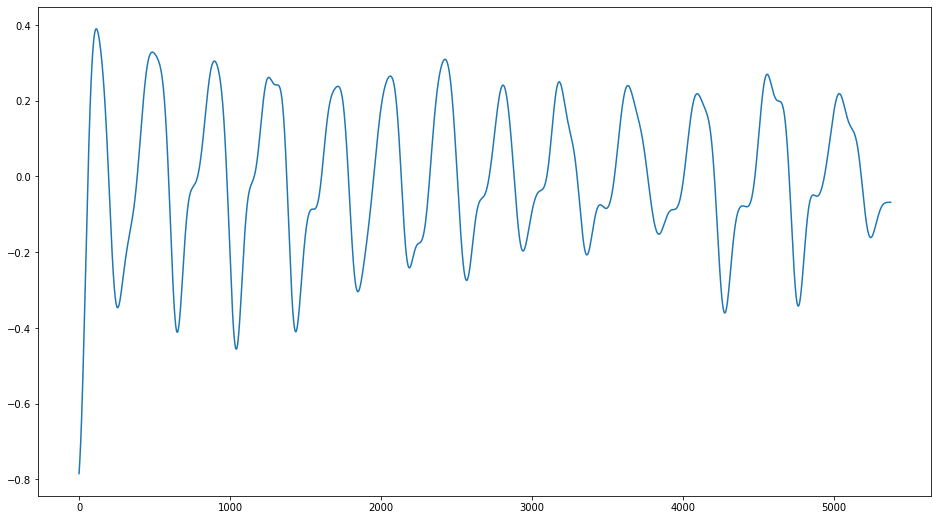

In [45]:
#LPF pada accelerometer y menggunakan direct method
soal5a = butter_lowpass(dm['Ay'],cutoff,FreqSamp,order) 
plt.figure(figsize=(16,9))
plt.plot(soal5a)
plt.show()

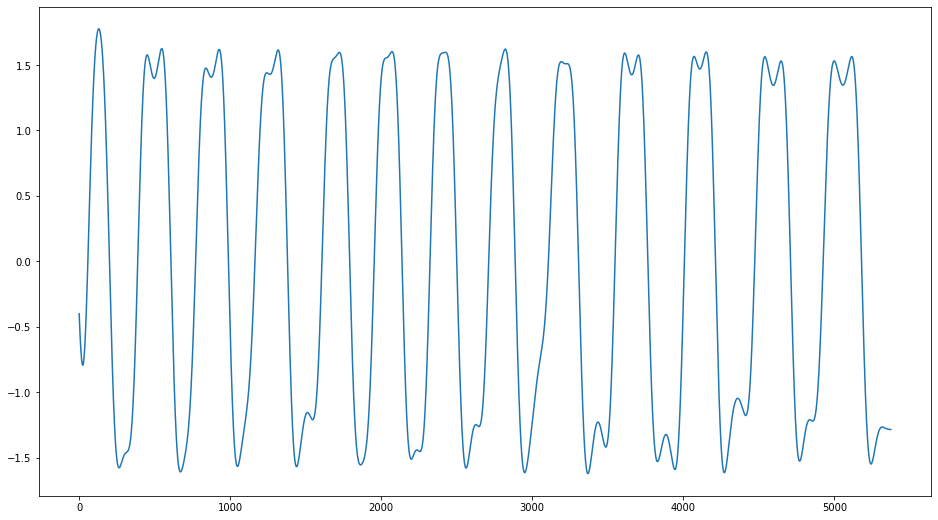

In [46]:
#LPF pada accelerometer y menggunakan metode inklinasi
soal5a = butter_lowpass(rho[0],cutoff,FreqSamp,order) 
plt.figure(figsize=(16,9))
plt.plot(soal5a)
plt.show()

Titik Puncak =  [ 114  485  896 1256 1312 1714 2061 2423 2807 3179 3634 4093 4556 5034]
Jumlah Peak =  14


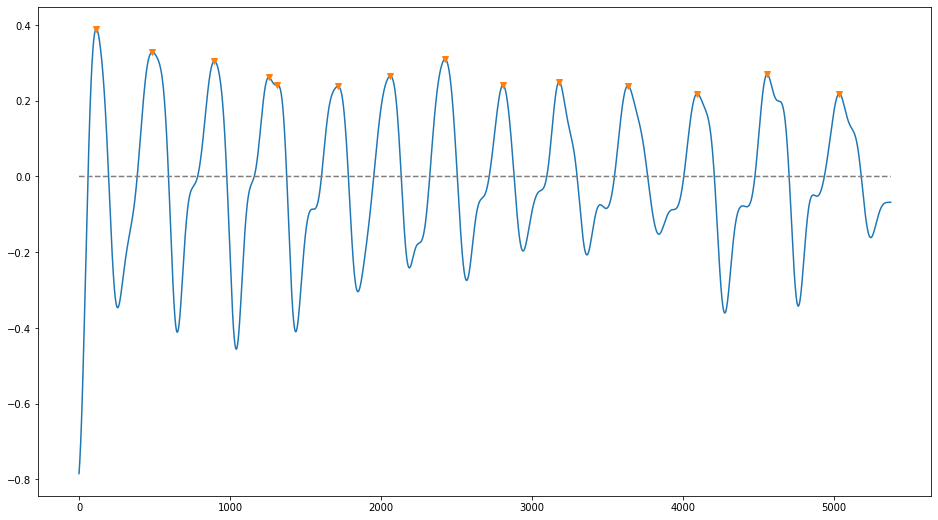

In [47]:
#import method find_peaks = untuk mendapatkan titik puncak
from scipy.signal import find_peaks
#melakukan filter pada data metode direct
soal5a = butter_lowpass(dm['Ay'],cutoff,FreqSamp,order)
#mendapatkan titik puncak dari data yang sudah difilter 
peaks, _ = find_peaks(soal5a, height=0, distance=1)
#visualisasi data
plt.figure(figsize=(16,9))
plt.plot(soal5a)
#visualisasi titik puncak
plt.plot(peaks, soal5a[peaks], "v")
#visualisasi garis 0
plt.plot(np.zeros_like(soal5a), "--", color="gray")
#menampilkan data titik puncak
print("Titik Puncak = ",peaks)
#manampilkan jumlah titik puncak
print("Jumlah Peak = ",len(peaks))
plt.show()

Titik Puncak =  [ 130  450  547  839  927 1242 1317 1723 2072 2424 2821 3192 3232 3612
 3703 4071 4152 4540 4648 4999 5115]
Jumlah Peak =  21


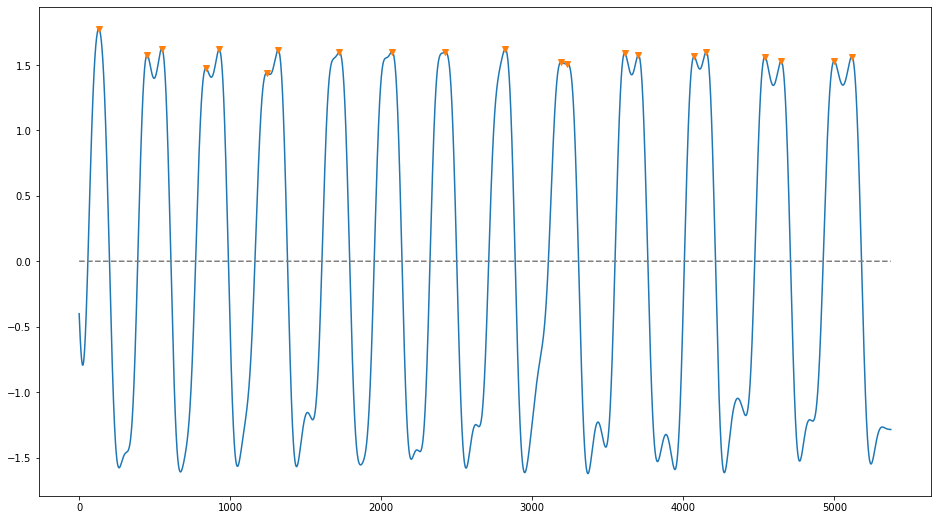

In [48]:
#import method find_peaks = untuk mendapatkan titik puncak
from scipy.signal import find_peaks
#melakukan filter pada data metode inklinasi
soal5a = butter_lowpass(rho[0],cutoff,FreqSamp,order)
#mendapatkan titik puncak dari data yang sudah difilter 
peaks, _ = find_peaks(soal5a, height=0, distance=1)
#visualisasi data
plt.figure(figsize=(16,9))
plt.plot(soal5a)
#visualisasi titik puncak
plt.plot(peaks, soal5a[peaks], "v")
#visualisasi garis 0
plt.plot(np.zeros_like(soal5a), "--", color="gray")
#menampilkan data titik puncak
print("Titik Puncak = ",peaks)
#manampilkan jumlah titik puncak
print("Jumlah Peak = ",len(peaks))
plt.show()